In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image

**Bitwise Operations**
**Function Syntax**

Example API for cv2.bitwise_and(). Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
dst: Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

src1: first input array or a scalar.
src2: second input array or a scalar.
An important optional argument is:

mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

**OpenCV Documentation**

https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

(200, 499)


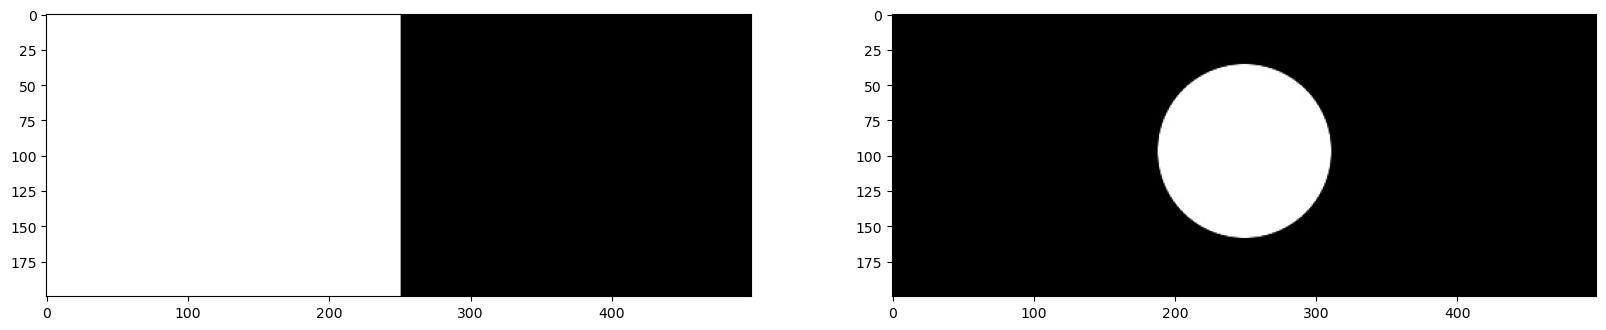

In [5]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec,cmap='gray')
plt.subplot(122);plt.imshow(img_cir,cmap='gray')
print(img_rec.shape)

**Bitwise AND Operation**


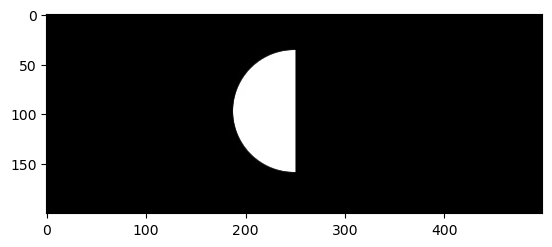

In [6]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

**Bitwise OR Operation**


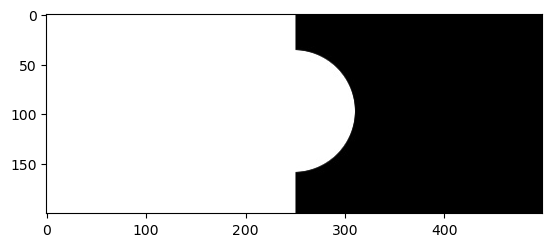

In [7]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

**Bitwise XOR Operation**


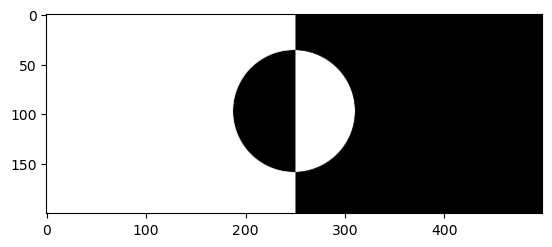

In [8]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

**Application: Logo Manipulation**
In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image


**Read Foreground Image**

(700, 700, 3)


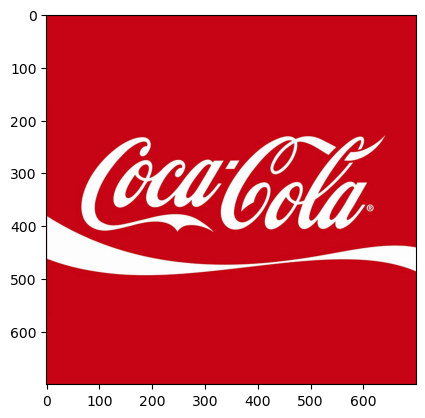

In [9]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

**Read Background Image**


img_background_rgb before resizing:[[[235 241 233]
  [151 184 140]
  [147 182 136]
  ...
  [147 165 198]
  [147 165 198]
  [147 165 198]]

 [[224 234 220]
  [ 92 145  74]
  [ 86 141  68]
  ...
  [ 85 113 166]
  [ 85 113 166]
  [ 85 113 166]]

 [[224 234 220]
  [ 92 145  74]
  [ 86 141  68]
  ...
  [ 85 113 166]
  [ 85 113 166]
  [ 85 113 166]]

 ...

 [[254 254 234]
  [250 251 147]
  [250 251 143]
  ...
  [160  40  94]
  [160  40  94]
  [160  40  94]]

 [[192 192 177]
  [189 189 111]
  [189 189 108]
  ...
  [136  48  87]
  [136  48  87]
  [136  48  87]]

 [[  2   2   1]
  [  2   1   1]
  [  2   1   1]
  ...
  [ 80  77  77]
  [ 80  77  77]
  [ 80  77  77]]]
img_background_rgb shape before resizing:(1800, 1800, 3)
(700, 700, 3)


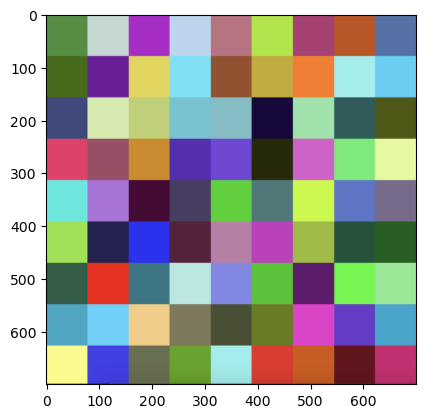

In [10]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

### Debugging ###
# img_background_rgb before transformation
print(f'img_background_rgb before resizing:{img_background_rgb}')
print(f'img_background_rgb shape before resizing:{img_background_rgb.shape}')
### End debugging ###

# Set desired width (logo_w) and maintain image aspect ratio 
# ratio=a/b1 => new_dim = (a, a1*ratio)
# Applying resize function => resized_img_bg = resize(img_bg, new_dim, resampling)
# where: a = width of the logo img, b  = height of the logo img, a1 = width of bg img, b1 = height of the bg img 
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb) 
print(img_background_rgb.shape)

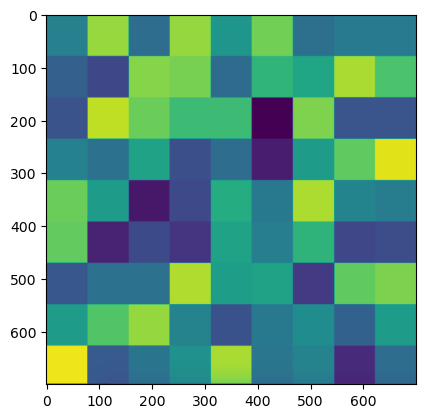

In [16]:
img_background_gray = cv2.cvtColor(img_background_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_background_gray)

**Create Mask for original Image**

(700, 700)


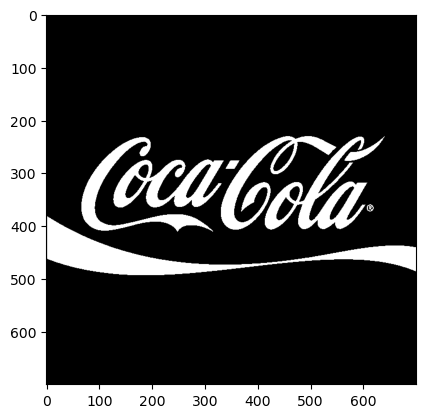

In [13]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

**Invert the Mask**




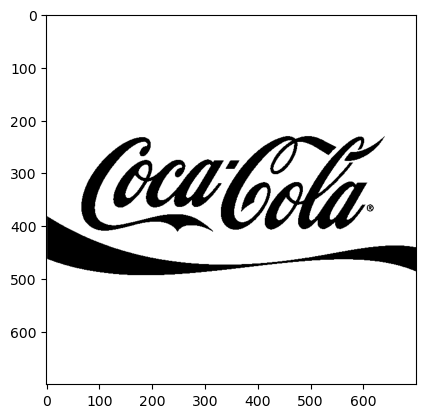

In [14]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

**Apply background on the Mask**

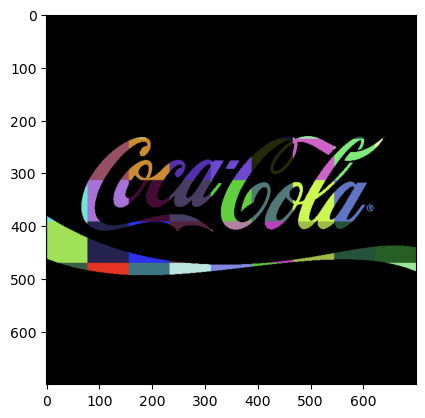

In [40]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)


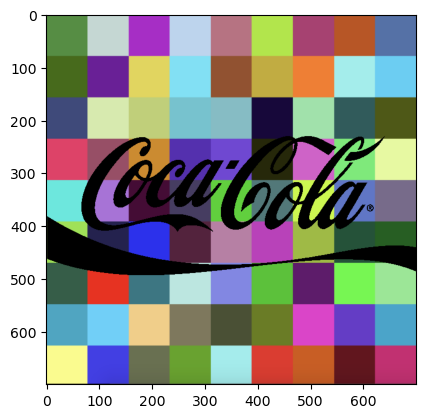

In [37]:

# Create colorful background "infront" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask_inv)
plt.imshow(img_background)

**Isolate foreground from image**


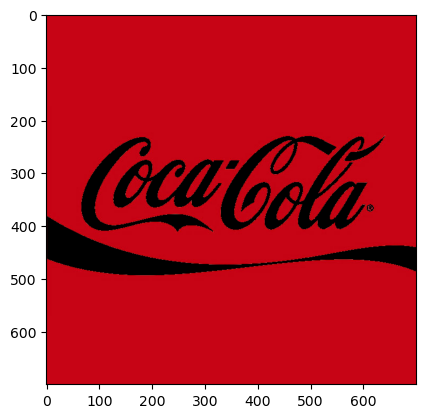

In [41]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
img_foreground = cv2.bitwise_or(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

**Result: Merge Foreground and Background**

True

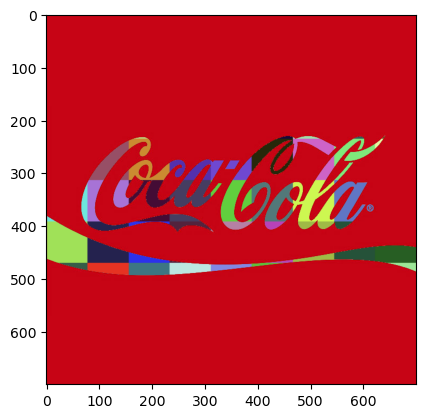

In [44]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])